In [11]:
using DifferentialEquations
using Plots

Example 1

In [12]:
α = 1.01
f(u, p, t) = α*u

f (generic function with 1 method)

In [13]:
time_span = (0.0, 10.0)
u0 = 1.0


1.0

In [21]:
sol = solve(ODEProblem(f, u0, time_span) , Tsit5())


retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 17-element Vector{Float64}:
  0.0
  0.0996226903808525
  0.3456357451227455
  0.6775707751308548
  1.0793400228042223
  1.5608989216223192
  2.1139815735892356
  2.7370179685996616
  3.423374231437398
  4.167827298360902
  4.964170155449269
  5.806686794445179
  6.6898488088732675
  7.608563188706255
  8.558204434831323
  9.534591794763596
 10.0
u: 17-element Vector{Float64}:
     1.0
     1.1058551391996163
     1.4177797635597718
     1.9824757749832103
     2.9746704858093787
     4.838028370515881
     8.458056659678014
    15.869248019609053
    31.740613104957653
    67.32181351088164
   150.4716025774671
   352.37382800840476
   859.7607464884765
  2174.413259633481
  5673.7203973191745
 15209.720736330011
 24336.971552720646

In [19]:
@show sol

sol = ODESolution{Float64, 1, Vector{Float64}, Nothing, Nothing, Vector{Float64}, Vector{Vector{Float64}}, Nothing, ODEProblem{Float64, Tuple{Float64, Float64}, false, SciMLBase.NullParameters, ODEFunction{false, SciMLBase.AutoSpecialize, typeof(f), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing, Nothing, Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, @NamedTuple{}}, SciMLBase.StandardODEProblem}, CompositeAlgorithm{0, Tuple{Tsit5{typeof(OrdinaryDiffEqCore.trivial_limiter!), typeof(OrdinaryDiffEqCore.trivial_limiter!), Static.False}, Vern7{typeof(OrdinaryDiffEqCore.trivial_limiter!), typeof(OrdinaryDiffEqCore.trivial_limiter!), Static.False}, Rosenbrock23{0, AutoFiniteDiff{Val{:forward}, Val{:forward}, Val{:hcentral}, Nothing, Nothing, Bool}, Nothing, typeof(OrdinaryDiffEqCore.DEFAULT_PRECS), Val{:forward}(), true, nothing, typeof(OrdinaryDiffEqCo

retcode: Success
Interpolation: 3rd order Hermite
t: 17-element Vector{Float64}:
  0.0
  0.0996226903808525
  0.3456357451227455
  0.6775707751308548
  1.0793400228042223
  1.5608989216223192
  2.1139815735892356
  2.7370179685996616
  3.423374231437398
  4.167827298360902
  4.964170155449269
  5.806686794445179
  6.6898488088732675
  7.608563188706255
  8.558204434831323
  9.534591794763596
 10.0
u: 17-element Vector{Float64}:
     1.0
     1.1058551391996163
     1.4177797635597718
     1.9824757749832103
     2.9746704858093787
     4.838028370515881
     8.458056659678014
    15.869248019609053
    31.740613104957653
    67.32181351088164
   150.4716025774671
   352.37382800840476
   859.7607464884765
  2174.413259633481
  5673.7203973191745
 15209.720736330011
 24336.971552720646

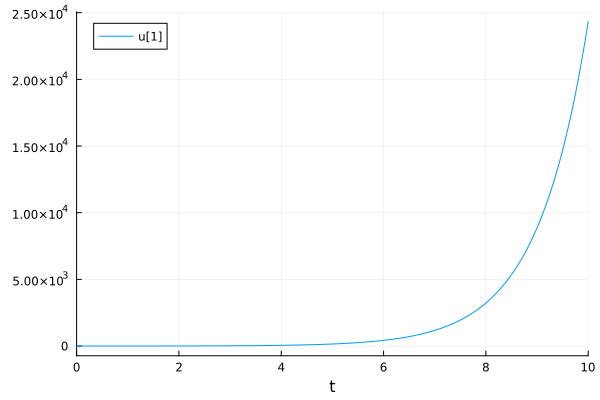

In [20]:
plot(sol)

Example 2

In [22]:
# Simple Harmonic Oscillator Problem
using OrdinaryDiffEq, Plots

#Parameters
ω = 1

#Initial Conditions
x₀ = [0.0]
dx₀ = [π / 2]
tspan = (0.0, 2π)

ϕ = atan((dx₀[1] / ω) / x₀[1])
A = √(x₀[1]^2 + dx₀[1]^2)

#Define the problem
function harmonicoscillator(ddu, du, u, ω, t)
    ddu .= -ω^2 * u
end

#Pass to solvers
prob = SecondOrderODEProblem(harmonicoscillator, dx₀, x₀, tspan, ω)
sol = solve(prob, DPRKN6())

#Plot
plot(sol, idxs = [2, 1], linewidth = 2, title = "Simple Harmonic Oscillator",
    xaxis = "Time", yaxis = "Elongation", label = ["x" "dx"])
plot!(t -> A * cos(ω * t - ϕ), lw = 3, ls = :dash, label = "Analytical Solution x")
plot!(t -> -A * ω * sin(ω * t - ϕ), lw = 3, ls = :dash, label = "Analytical Solution dx")

ArgumentError: ArgumentError: Package OrdinaryDiffEq not found in current path, maybe you meant `import/using .OrdinaryDiffEq`.
- Otherwise, run `import Pkg; Pkg.add("OrdinaryDiffEq")` to install the OrdinaryDiffEq package.